In [39]:
library(data.table)
source("/net/fantasia/home/yjingj/Scripts/Rscript/R_Funcs/LoadData_func.r")
source("/net/fantasia/home/yjingj/Scripts/Rscript/R_Funcs/qplot_func.r")

data_dir="/net/fantasia/home/yjingj/GIT/bfGWAS_SS/1KG_example/Test_Wkdir/output/"


In [55]:
filehead="CFH_REGION_1KG"

paste(data_dir, filehead, "_SS.paramtemp", sep="")

paramdata_SS = Load_bfGWAS_SS(paste(data_dir, filehead, "_SS.paramtemp", sep=""), header = FALSE)
dim(paramdata_SS)
head(paramdata_SS)

paste(data_dir, filehead, ".paramtemp", sep="")
paramdata = Load_bfGWAS(paste(data_dir, filehead, ".paramtemp", sep=""))
dim(paramdata)
head(paramdata)

sum(paramdata$ID == paramdata_SS$ID)

[1] "/net/fantasia/home/yjingj/GIT/bfGWAS_SS/1KG_example/Test_Wkdir/output/CFH_REGION_1KG_SS.paramtemp"

[1] 3689   12

ID,chr,bp,ref,alt,maf,func,beta,pi,Chi2,pval_Chi2,rank
esv3588466,1,196602664,<CN0>,A,0.03434505,5,0,0,4.6970290,0.03021480,455
esv3588478,1,196782355,<CN0>,G,0.01936901,5,0,0,1.3601370,0.24351380,1355
esv3588481,1,196852281,<CN0>,T,0.01697284,5,0,0,2.3571860,0.12470700,1051
esv3588483,1,196886381,<INS:ME:ALU>,A,0.02535942,5,0,0,6.2444700,0.01245816,238
rs1009188,1,197257090,C,T,0.18929710,0,0,0,0.3387828,0.56053270,2659
rs10159146,1,196181359,G,A,0.98722040,0,0,0,0.9925247,0.31912610,1636


[1] "/net/fantasia/home/yjingj/GIT/bfGWAS_SS/1KG_example/Test_Wkdir/output/CFH_REGION_1KG.paramtemp"

[1] 3689   14

ID,chr,bp,ref,alt,maf,func,beta,pi,Zscore,SE_beta,LRT,pval_LRT,rank
esv3588466,1,196602664,<CN0>,A,0.03434505,5,0,0,-3.0439220,0.07619303,9.2826470,0.0023133490,455
esv3588478,1,196782355,<CN0>,G,0.01936901,5,0,0,1.6390880,0.10138770,2.6880510,0.1011034000,1355
esv3588481,1,196852281,<CN0>,T,0.01697284,5,0,0,2.1573540,0.10773950,4.6585080,0.0309000300,1051
esv3588483,1,196886381,<INS:ME:ALU>,A,0.02535942,5,0,0,3.5086160,0.09105713,12.3407400,0.0004431782,238
rs1009188,1,197257090,C,T,0.18929710,0,0,0,0.8182012,0.03501949,0.6695428,0.4132111000,2659
rs10159146,1,196181359,G,A,0.98722040,0,0,0,1.4002750,0.12462090,1.9615390,0.1613488000,1636


[1] 3689

In [56]:
#plot(-log10(paramdata_SS$pval_Chi2), -log10(paramdata$pval_LRT))


range(paramdata$pi)
which(paramdata$pi > 0.1068)
paramdata[paramdata$pi > 0.1068, ]

range(paramdata_SS$pi)
which(paramdata_SS$pi > 0.1068)
paramdata_SS[paramdata_SS$pi > 0.1068, ]

#plot(paramdata_SS$pi, paramdata$pi)
#abline(0, 1)

[1] 0.00000 0.99962

[1]   54   81   82 1289 2407 2478

ID,chr,bp,ref,alt,maf,func,beta,pi,Zscore,SE_beta,LRT,pval_LRT,rank
rs10801558,1,196699044,G,T,0.5075879,0,-0.2215412,0.17164,-11.76653,0.02817263,142.4260,7.847559e-33,1
rs10922108,1,196701473,T,A,0.5079872,0,-0.2214881,0.17034,-11.76614,0.02817333,142.4164,7.885465e-33,3
rs10922109,1,196704632,A,C,0.5075879,0,-0.2215676,0.17908,-11.76653,0.02817263,142.4260,7.847559e-33,2
rs1410996,1,196696933,A,G,0.5049920,0,-0.2201106,0.12914,-11.76492,0.02809103,142.3860,8.007010e-33,5
rs35352142,1,196712902,T,C,0.1920927,0,0.2878076,0.99962,11.93900,0.03494836,146.7576,8.865969e-34,0
rs3766405,1,196695161,T,C,0.5049920,0,-0.2202456,0.13782,-11.76492,0.02809103,142.3860,8.007010e-33,4


[1] 0.00000 0.35346

[1] 2407

ID,chr,bp,ref,alt,maf,func,beta,pi,Chi2,pval_Chi2,rank
rs35352142,1,196712902,T,C,0.1920927,0,0.2077137,0.35346,74.26274,6.838194e-18,0


[1] 1.0096

[1] 1.99904

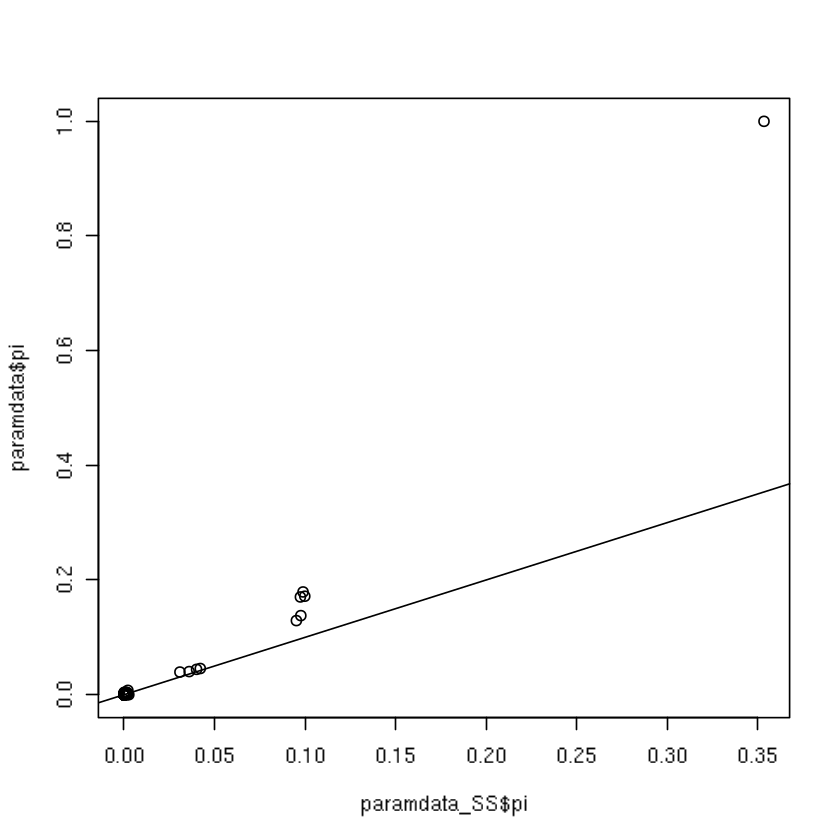

In [57]:
sum(paramdata_SS$pi)
sum(paramdata$pi)
plot(paramdata_SS$pi, paramdata$pi)
abline(0, 1)

In [38]:
a =  4.15671
b = 0.670128

(a - b) / a

[1] 0.838784